In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

pd.pandas.set_option("display.max_columns", None)

In [2]:
data = pd.read_csv("../raw/insurance_data.csv")

In [3]:
data.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [4]:
data.drop(['index', 'PatientID'], axis=1, inplace=True)

data.shape

(1340, 9)

In [5]:
data.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,NaN,male,34.1,100,No,0,No,northwest,1137.01


The dataset contains 1340 rows that is patient and 9 columns.

8 are predictive variables and 1 is the target variable: claim



We will analyse the following:

1. The target variabel
2. Variable Types (categorical and numerical)
3. Missing data
4. Numberical variables
    - Discrete
    - Continuous
    - Distributions
    - Transformations
5. Categorical variables
    - Cardinality

## The target variables

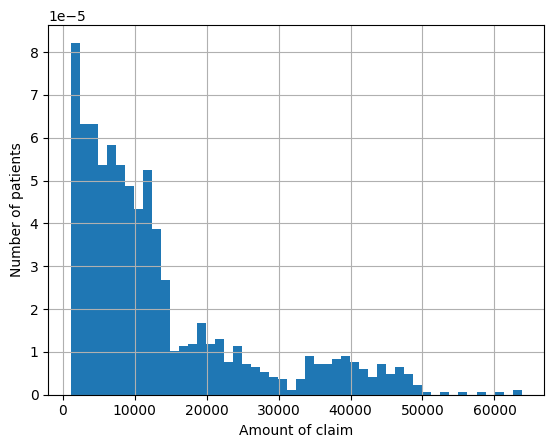

In [6]:
data['claim'].hist(bins=50, density=True)
plt.ylabel("Number of patients")
plt.xlabel("Amount of claim")
plt.show()

The target is continuous and the distribution is skewed towards the right.
We should improve the value spread.

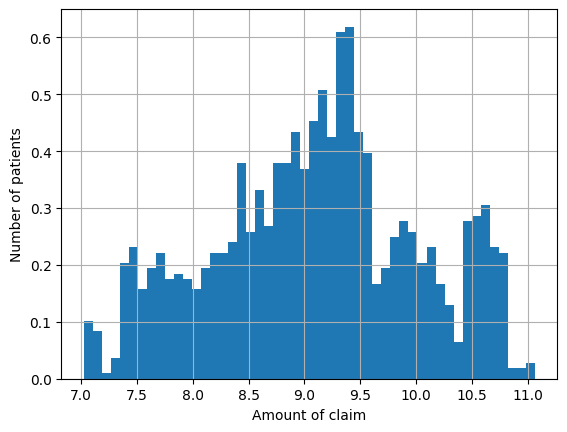

In [7]:
np.log(data['claim']).hist(bins=50, density=True)
plt.ylabel("Number of patients")
plt.xlabel("Amount of claim")
plt.show()

## Variables Types

In [8]:
cat_vars = [var for var in data.columns if data[var].dtype == 'O']

len(cat_vars)

4

In [9]:
cat_vars

['gender', 'diabetic', 'smoker', 'region']

In [10]:
data[cat_vars]

,gender,diabetic,smoker,region
0,male,Yes,No,southeast
1,male,No,No,southeast
2,male,Yes,No,southeast
3,male,No,No,northwest
4,male,No,No,northwest
...,...,...,...,...
1335,female,Yes,Yes,northwest
1336,female,No,Yes,northeast
1337,male,Yes,Yes,northwest
1338,male,No,Yes,southeast


In [11]:
num_vars = [var for var in data.columns if var not in cat_vars 
           and var != "claim"]

In [12]:
num_vars

['age', 'bmi', 'bloodpressure', 'children']

In [13]:
data[num_vars]

,age,bmi,bloodpressure,children
0,39.0,23.2,91,0
1,24.0,30.1,87,0
2,NaN,33.3,82,0
3,NaN,33.7,80,0
4,NaN,34.1,100,0
...,...,...,...,...
1335,44.0,35.5,88,0
1336,59.0,38.1,120,1
1337,30.0,34.5,91,3
1338,37.0,30.4,106,0


We can find out that *gender*, *diabetic*, *smoker*, *region* are **categorical variables** and *age*, *bmi*, *bloodpressure* and *children* are **numerical variables**

## Missing Values

Let's find out missing values

In [14]:
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

In [15]:
vars_with_na

['age', 'region']

In [16]:
data[vars_with_na].isnull().sum() / len(data)

age       0.003731
region    0.002239
dtype: float64

The dataset has very small amount of missing values in age and region. These two columns need to be imputed

In [17]:
cat_na = [var for var in cat_vars if var in vars_with_na]

In [18]:
cat_na

['region']

In [19]:
num_na = [var for var in num_vars if var in vars_with_na]

In [20]:
num_na

['age']

#### Relationship between missing data and sale price

In [23]:
def analyse_na_value(df, var):

    df = df.copy()

    df[var] = np.where(df[var].isnull(), 1, 0)

    tmp = df.groupby(var)['claim'].agg(['mean', 'std'])

    # plot into a bar graph
    tmp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title="Sale Price", color='green')

    plt.show()

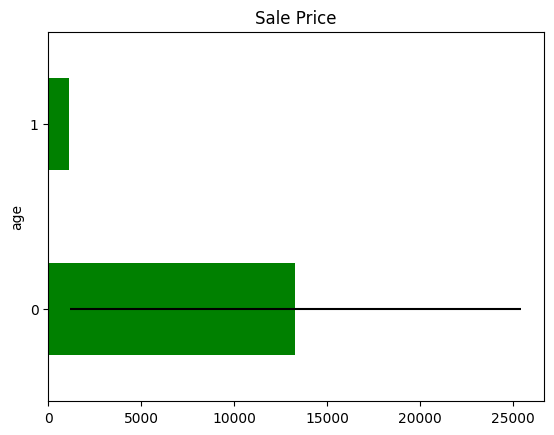

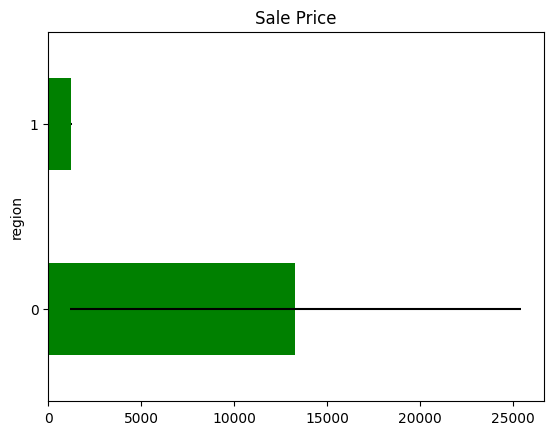

In [24]:
# let's run the function on each variable with missing data

for var in vars_with_na:
    analyse_na_value(data, var)

## Numerical variables

### Discrete variables 

In [55]:
discrete_vars = [var for var in num_vars if len(
data[var].unique()) < 20]

In [56]:
discrete_vars

['children']

While age can be considered as discrete or continuous based on the nature, let's consider age as continuous in this example.

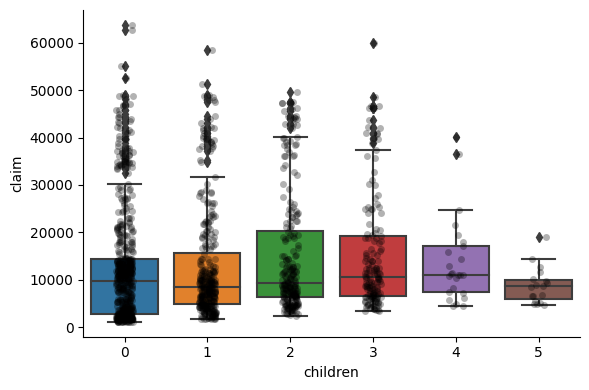

In [57]:
for var in discrete_vars:
    
    sns.catplot(x=var, y='claim', data=data, kind='box', height=4, aspect=1.5)
    sns.stripplot(x=var, y='claim', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()

### Continuous variable

In [58]:
cont_vars = [var for var in num_vars if var not in discrete_vars]

In [59]:
cont_vars

['age', 'bmi', 'bloodpressure']

In [60]:
data[cont_vars].head()

,age,bmi,bloodpressure
0,39.0,23.2,91
1,24.0,30.1,87
2,NaN,33.3,82
3,NaN,33.7,80
4,NaN,34.1,100


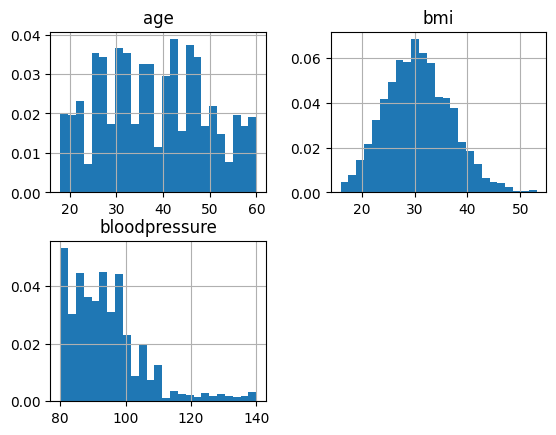

In [78]:
data[cont_vars].hist(bins=25, density=True)
plt.show()

**bloodpressure** is right skewed and its feature needs to be transformed

### Yeo Johnson transformation

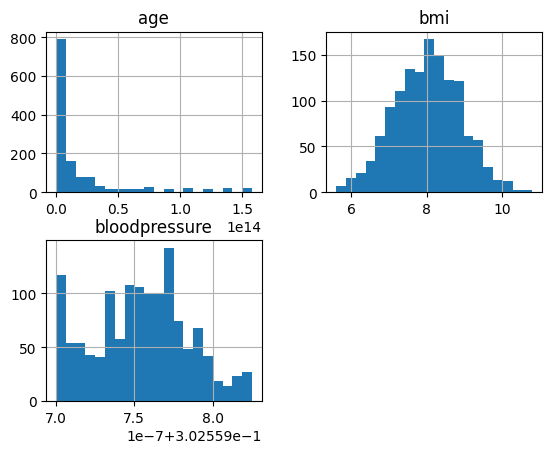

In [82]:
tmp = data.copy()

for var in cont_vars:

    tmp[var], param = stats.yeojohnson(data[var])

tmp[cont_vars].hist(bins=20)
plt.show()

By Yeo Johnson transformation, only bmi features are more like gaussian but age and bloodpressure features need to be improved

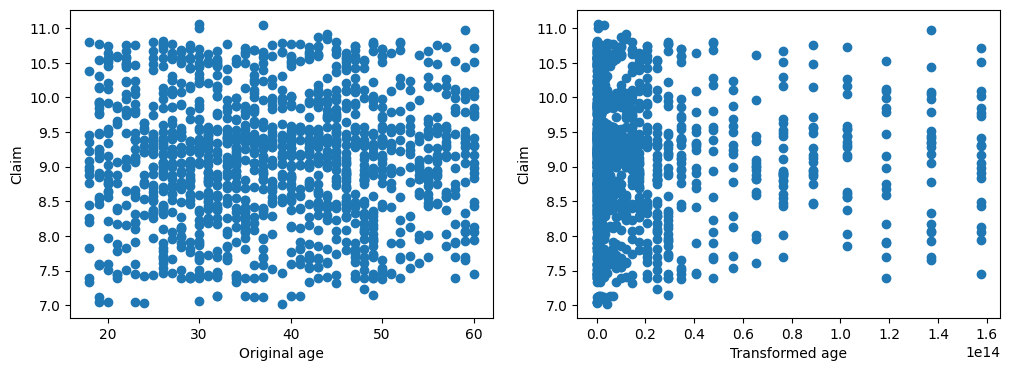

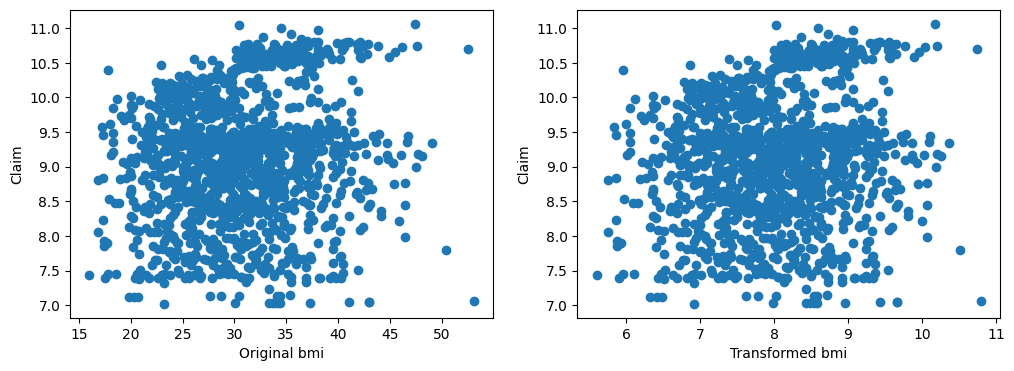

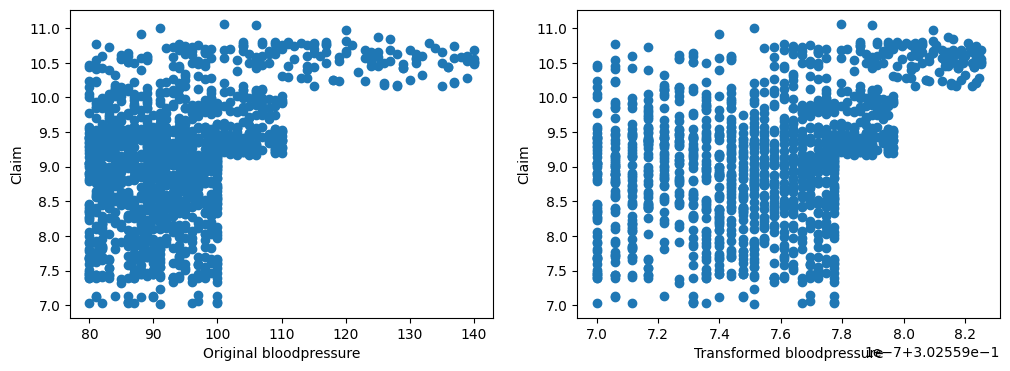

In [83]:
for var in cont_vars:
    
    plt.figure(figsize=(12,4))

    # plot the original variable vs sale price    
    plt.subplot(1, 2, 1)
    plt.scatter(data[var], np.log(data['claim']))
    plt.ylabel('Claim')
    plt.xlabel('Original ' + var)

    # plot transformed variable vs sale price
    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], np.log(tmp['claim']))
    plt.ylabel('Claim')
    plt.xlabel('Transformed ' + var)

    plt.show()

Blood pressure value is more widespread due to transformation. Maybe the relation between claim and transformed bloodpressure seems to be improved by yeo johnson transformation

### Logarithmic transformation

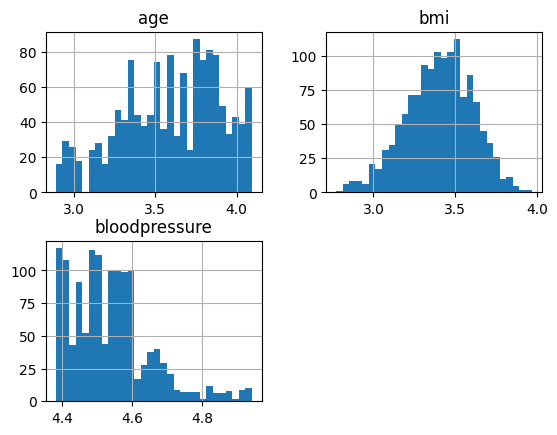

In [84]:
tmp = data.copy()

for var in cont_vars:

    # transform the variable with logarithm
    tmp[var] = np.log(data[var])
    
tmp[cont_vars].hist(bins=30)
plt.show()

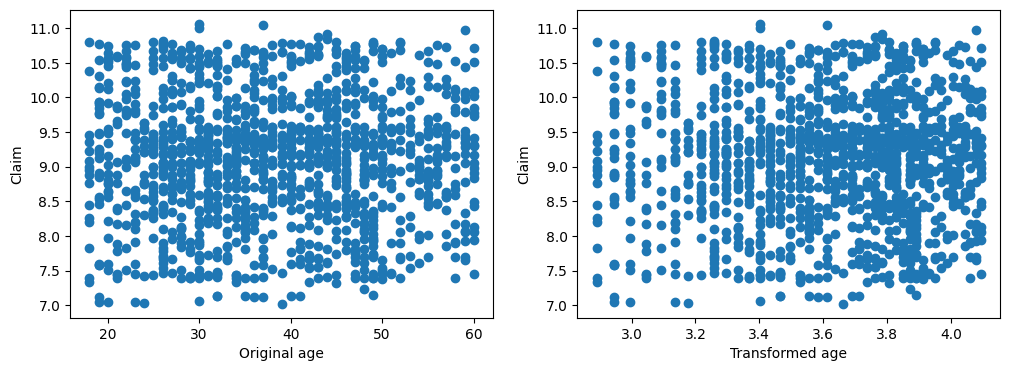

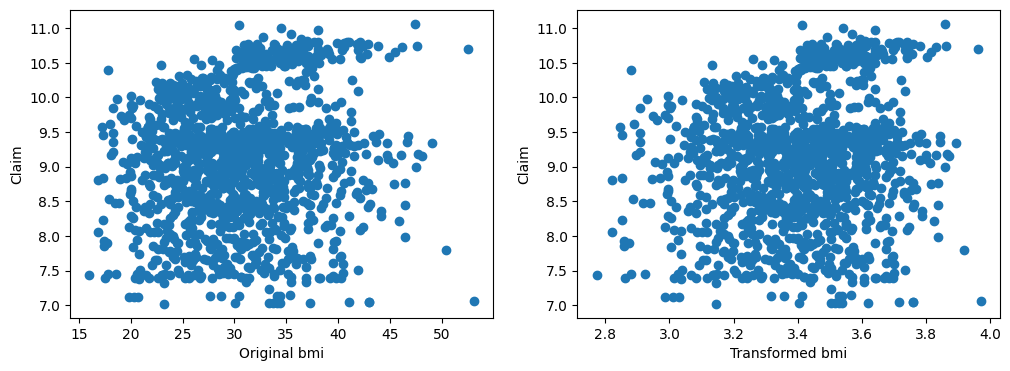

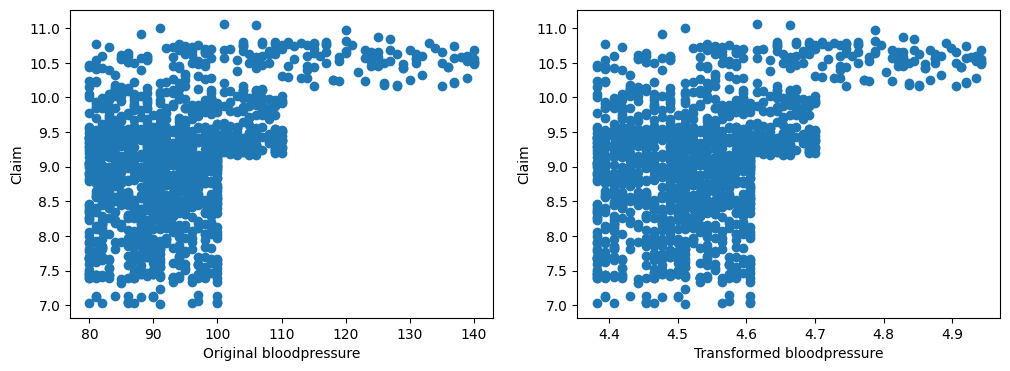

In [85]:
for var in cont_vars:
    
    plt.figure(figsize=(12,4))
    
    # plot the original variable vs sale price    
    plt.subplot(1, 2, 1)
    plt.scatter(data[var], np.log(data['claim']))
    plt.ylabel('Claim')
    plt.xlabel('Original ' + var)

    # plot transformed variable vs sale price
    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], np.log(tmp['claim']))
    plt.ylabel('Claim')
    plt.xlabel('Transformed ' + var)
                
    plt.show()

logarithmic transformation *didn't improve* anything by visual.

## Categorical variables

In [87]:
cat_vars

['gender', 'diabetic', 'smoker', 'region']

### Cardinality 

<AxesSubplot: >

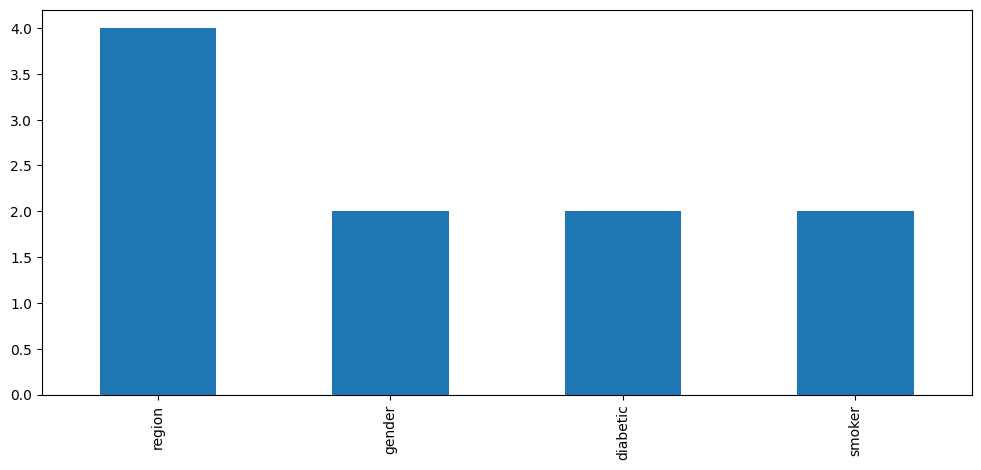

In [88]:
data[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12, 5))

The number of unique values in the categorical values are relatively **small**. That's great for encoding the features. Let's 

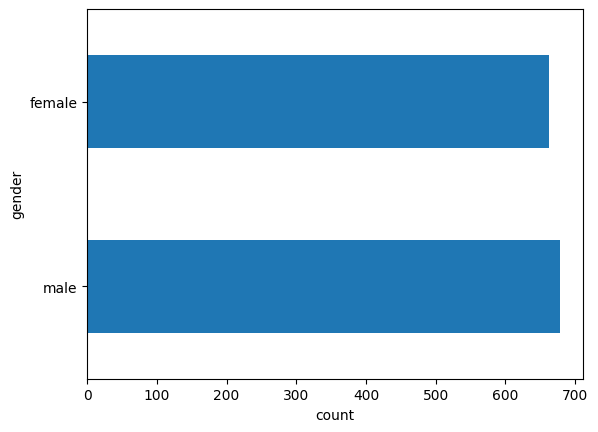

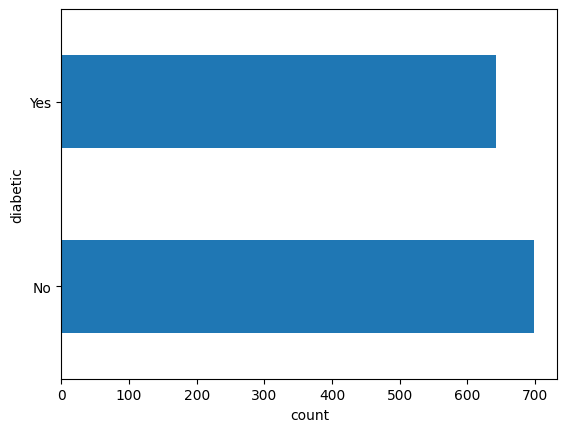

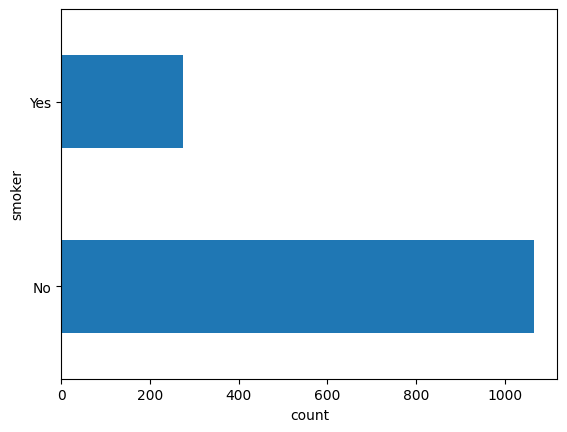

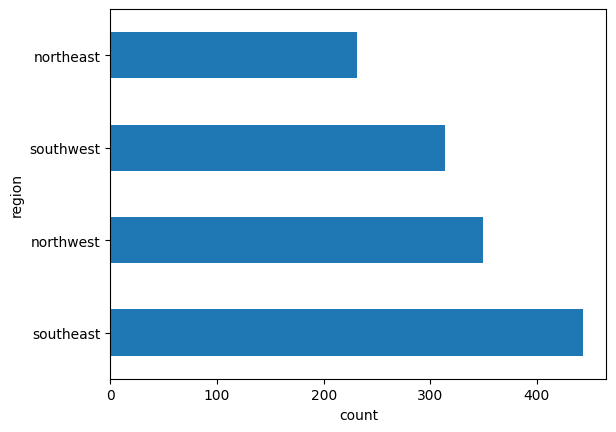

In [89]:
for var in cat_vars:
    data[var].value_counts().plot.barh()
    plt.ylabel(f"{var}")
    plt.xlabel("count")
    plt.show()